# Exercise Sheet 1

### 1.1 PyTorch Tensor Indexing
Here you can find a small overview and explanation of the tensor syntax.

In [1]:
import torch

A PyTorch-tensor can easily created given a Python list. Nested lists yield higher dimensional objects:

In [2]:
tensor_1 = torch.tensor([1, 2, 3]) # a vector with 3 entries
tensor_2 = torch.tensor([[1, 2], [0, 7]]) # a 2x2 matrix
print("Example for a vector:", tensor_1)
print("Example for a matrix: \n", tensor_2)

Example for a vector: tensor([1, 2, 3])
Example for a matrix: 
 tensor([[1, 2],
        [0, 7]])


Instead of creating larger tensors per hand, the constructors `torch.zeros` and `torch.ones` can create tensor of a given size:

In [3]:
tensor_zeros = torch.zeros(3) #  # a vector with 3 zero entries
tensor_ones = torch.ones((2, 2)) # a 2x2 matrix with ones
print("Example for a vector:", tensor_zeros)
print("Example for a matrix: \n", tensor_ones)

Example for a vector: tensor([0., 0., 0.])
Example for a matrix: 
 tensor([[1., 1.],
        [1., 1.]])


Also tensors with more than two dimensions can be created. This will be important later, when we generally use the first dimension as the size of data batches and the later dimensions for problem specific data.

With `tensor.shape` we can see the size of a tensor and how many entries each dimension contains.

With `tensor[index_values]` one can view and modify the entries of the tensor. Here, the *index_values* have to be smaller than the size of each dimension-1, since we start counting at index 0.

In [10]:
test_tensor = torch.zeros((3, 2, 2)) # could be interpreted as three 2x2 matrices
# Of course, more complex tensors could be created, but we use here only this simple example.

print("Check shape of tensor:", test_tensor.shape)

print("Check top left entry of the first 'matrix':", test_tensor[0, 0, 0])
test_tensor[0, 0, 0] = 1.0
print("Check new top left entry of the first 'matrix':", test_tensor[0, 0, 0])
print("Change more values")
test_tensor[0, 0, 1] = 2.0
test_tensor[2, 1, 0] = 5.0
print(test_tensor)

print("Indexing also works with boolean values:")
print(test_tensor[[True, False, True]])
print("This returned the first and last element of the first axis!")

Check shape of tensor: torch.Size([3, 2, 2])
Check top left entry of the first 'matrix': tensor(0.)
Check new top left entry of the first 'matrix': tensor(1.)
Change more values
tensor([[[1., 2.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [5., 0.]]])
Indexing also works with boolean values:
tensor([[[1., 2.],
         [0., 0.]],

        [[0., 0.],
         [5., 0.]]])


Trying `test_tensor[3, 0, 0]` would throw an IndexError! Even if our first dimension has size 3, the index only runs from 0 to 2.

Instead fo setting the value of entry by hand, we can utlize Python’s indexing and slicing notation `:`.

Using `:` as an index at one position inside `[]` will do the assignment for all entries in the corresponding dimension.

In [5]:
test_tensor[:, 0, 0] = 2 # set the top left entry of every 'matrix' to 2
print("Top left is 2:")
print(test_tensor)

# they can also be combined:
test_tensor[:, 1, :] = 3 # set all values in the bottom row of every 'matrix' to 3
print("Bottom row has 3:")
print(test_tensor)

Top left is 2:
tensor([[[2., 2.],
         [0., 0.]],

        [[2., 0.],
         [0., 0.]],

        [[2., 0.],
         [5., 0.]]])
Bottom row has 3:
tensor([[[2., 2.],
         [3., 3.]],

        [[2., 0.],
         [3., 3.]],

        [[2., 0.],
         [3., 3.]]])


Slicing is even more powerful. It works also with inplace math operations, assignment of tensor values (as long both sides have a **compatible shape**). And instead of running over all values, one can also start at value `k` with `k:` or only go to the value just before `k` with `:k`.

In [6]:
test_tensor[:, 0, 0] += 1 # add 1 to the top left entry of every 'matrix'
print("Top left is now:")
print(test_tensor)

new_values = torch.linspace(1, 3, 3) # three equdistant points between 1 and 3
print("new values:", new_values)
test_tensor[:, 0, 1] = new_values # change top right values
print("Top right is now:")
print(test_tensor)

print("Only change first two matrices:")
test_tensor[:2, 0, :] *= -1
print(test_tensor)

Top left is now:
tensor([[[3., 2.],
         [3., 3.]],

        [[3., 0.],
         [3., 3.]],

        [[3., 0.],
         [3., 3.]]])
new values: tensor([1., 2., 3.])
Top right is now:
tensor([[[3., 1.],
         [3., 3.]],

        [[3., 2.],
         [3., 3.]],

        [[3., 3.],
         [3., 3.]]])
Only change first two matrices:
tensor([[[-3., -1.],
         [ 3.,  3.]],

        [[-3., -2.],
         [ 3.,  3.]],

        [[ 3.,  3.],
         [ 3.,  3.]]])


Lastly, slicing can also be used to extract a smaller *sub-tensor* that keeps the shape of the original one:

In [7]:
tensor_sub_1 = test_tensor[0] # returns the first 'matrix'
tensor_sub_2 = test_tensor[:1] # returns also the first 'matrix'
# But:
print(tensor_sub_1.shape, tensor_sub_2.shape)
print("The shape is different! In the first case we lost the first dimension.")

torch.Size([2, 2]) torch.Size([1, 2, 2])
The shape is different! In the first case we lost the first dimension.


Math operations can also be used between different tensors (generally they need to be of **similar shape** for this to work). If they have the same shape, most operations work entrywise: 

In [8]:
tensor_1 = torch.tensor([1, 2, 3])
tensor_2 = torch.tensor([2, 0.1, 5])
print("Add:", tensor_1 + tensor_2)
print("Multiply:", tensor_1 * tensor_2)
print("Divide:", tensor_1 / tensor_2)
print("Works also with scalar values")
print("Add:", 3.0 + tensor_1)
print("Multiply:", 2.5 * tensor_1)

Add: tensor([3.0000, 2.1000, 8.0000])
Multiply: tensor([ 2.0000,  0.2000, 15.0000])
Divide: tensor([ 0.5000, 20.0000,  0.6000])
Works also with scalar values
Add: tensor([4., 5., 6.])
Multiply: tensor([2.5000, 5.0000, 7.5000])


With `reshape` one can transform a given tensor into a different shape. For this to work, both starting and final shape need to store the same number elements.

In [9]:
tensor_1 = torch.tensor([[1, 2], [0, 5]])
# transform 2x2 matrix to 4 dim. vector:
print("Start with a matrix:")
print(tensor_1)
print(".reshape(4) gives:")
print(tensor_1.reshape(4)) 

print("\nWorks also on batches (multidimensional data)")
print(test_tensor) 
print("Now a batch of 4 dim. vectors:")
print(test_tensor.reshape(3, 4))

Start with a matrix:
tensor([[1, 2],
        [0, 5]])
.reshape(4) gives:
tensor([1, 2, 0, 5])

Works also on batches (multidimensional data)
tensor([[[-3., -1.],
         [ 3.,  3.]],

        [[-3., -2.],
         [ 3.,  3.]],

        [[ 3.,  3.],
         [ 3.,  3.]]])
Now a batch of 4 dim. vectors:
tensor([[-3., -1.,  3.,  3.],
        [-3., -2.,  3.,  3.],
        [ 3.,  3.,  3.,  3.]])


With `.to` the tensors can be moved to different devices (e.g. to a GPU with `.to("cuda")` and to the CPU with `.to("CPU")`). For operations between two tensors, both have to be on the same device.

This is ends our small overview. There are many more properites and functions, but the above syntax is enough for the following tasks. 

For more informations one can always check the offical [PyTorch documentation](https://pytorch.org/docs/stable/tensors.html).

### b) Indexing with Boolean Values
In cell 4 we already saw that we can index a tensor with boolean values. This can be helpful to modify large tensors.
Here, we want to use this property to change the values of a tensor to *draw* something.

We start with a blank tensor called `image`, with a width and height of 128 pixels. We want to *draw* the following:

    - A sun (disk) at the pixel position x=100, y=100 with radius 20
    - Mountains where the pixel coordinates (x, y) fulfill the condition $35 + 5sin(0.2*x) >= y$

This can be implemented with boolean tensor indexing and `torch.sqrt, torch.sin`.

<ipython-input-37-130971653af7>:12: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  idx_x, idx_y = torch.meshgrid(torch.range(0, res_x-1), torch.range(0, res_y-1))


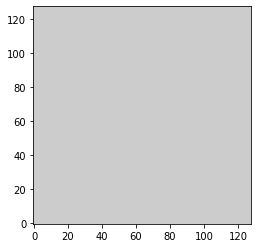

In [37]:
import matplotlib.pyplot as plt
import torch

### Parameters:
res_x, res_y = 128, 128
sun_color = 1.0
bg_color = 0.8
mountain_color = 0.2

image = bg_color * torch.ones((res_x, res_y)) # the image color (e.g. image[k, j] = color)
# two tensors containing the indices of the image (e.g idx_x[k, j] = k and ind_y[k, j] = j)
idx_x, idx_y = torch.meshgrid(torch.range(0, res_x-1), torch.range(0, res_y-1))

### Show the empty image
plt.imshow(image.mT, cmap='gray', vmin=0, vmax=1, origin="lower")

In [ ]:
### TODO: Draw the sun and mountains:


plt.imshow(image.mT, cmap='gray', vmin=0, vmax=1, origin="lower")